In [2]:
#IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot
#from statsmodels.tsa.stattools import adfuller
#import math
#from statsmodels.tsa.stattools import acf,pacf
#from statsmodels.tsa.arima_model import ARIMA
#import warnings
#import itertools
import matplotlib.pylab as pylab
import locale
#https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
#https://fxdata.cloud/tutorials/a-guide-for-time-series-forecasting-with-arima-in-python-3


In [3]:
# Set default parameters
# Standardise Output
locale.setlocale(locale.LC_ALL, 'UK')
params = {'legend.fontsize':'xx-large',
         'figure.figsize':(10,6),
         'axes.labelsize':'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
        'axes.formatter.use_locale':True
         }
pylab.rcParams.update(params)

In [6]:
#Read Dataframe

file = "C:\\JupyterNB\\Data\\Historical Product Demand.csv"
df= pd.read_csv(file)
print("Using: {}".format(file))

# Datatypes
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True, errors='coerce')
df.Order_Demand = pd.to_numeric(df['Order_Demand'], errors = 'coerce')
df = df.dropna(subset=['Date'])

#Remove Negative Orders and NAs
df.dropna()

df = df[df['Order_Demand'] >= 0]

df['Year'] = pd.DatetimeIndex(df['Date']).year
#df['Month'] = pd.DatetimeIndex(df['Date']).month

#df['MMM-YYYY'] = pd.PeriodIndex(df['Date'], freq='M').strftime('%b-%Y')
#df['MMM-YYYY'] = df['Date'].strftime('%b-%Y')

#df['YYYY-MMM'] = df['Date'].dt.strftime("%Y-%b")

#df['YYYYMM'] = pd.to_numeric(df['Date'].dt.strftime("%Y%m"), errors = 'coerce')

df['YYYYMM'] = df['Date'].dt.strftime("%Y%m").astype('str')
#df['MMM-YYYY'] = pd.to_datetime(df['Date'], format='%Y%m%d').dt.strftime("%Y-%b")
# Order
df.sort_values(by='Date')
df.head()

Using: C:\JupyterNB\Data\Historical Product Demand.csv


,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,YYYYMM
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0,2012,201207
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0,2012,201201
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0,2012,201202
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0,2012,201202
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0,2012,201203


In [7]:
df.head()
# RowCOunt
#len(df)
#Largest Order
#df[df['Order_Demand'] == df['Order_Demand'].max()]

#len(df['Product_Code'].unique())
#df['Product_Code'].nunique()
#df['Product_Category'].value_counts()
#df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,YYYYMM
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0,2012,201207
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0,2012,201201
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0,2012,201202
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0,2012,201202
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0,2012,201203


In [8]:

#DataFrame.Year = np.round(DataFrame['Year'],0).astype(int)
Warehouse = df.Warehouse.unique()
#print(DataFrame)

#totalDemandbyDate = df.groupby('Date')['Order_Demand'].sum()
#totalDEmandbyDate.tail()
# extra [] needed to return dataframe i.e. [['Order_Demand']]
# single bracket returns series objects
totalOrdersbyDateandPC = df.groupby(['Date','Product_Category'])[['Order_Demand']].sum()
totalOrdersbyDate = df[(df['Year'].isin([2012,2013,2016])) | (df['Year'] == 2014) | (df['Year'] == 2015) ].groupby(['YYYYMM'])[['Order_Demand']].sum()
#print(type(totalOrdersbyDate))
#totalOrdersbyDate.columns=['Date','Product Category','Total Orders'] 
#unset and reset index as needed
#totalOrdersbyDateandPC.reset_index(inplace=True)
#totalOrdersbyDate.reset_index(inplace=True)

#totalOrdersbyDate.set_index(['Date','Product_Category'])

totalOrdersbyDate.tail(5)

,Order_Demand
YYYYMM,
201608,80260600.0
201609,77654481.0
201610,83927472.0
201611,89989237.0
201612,80402121.0


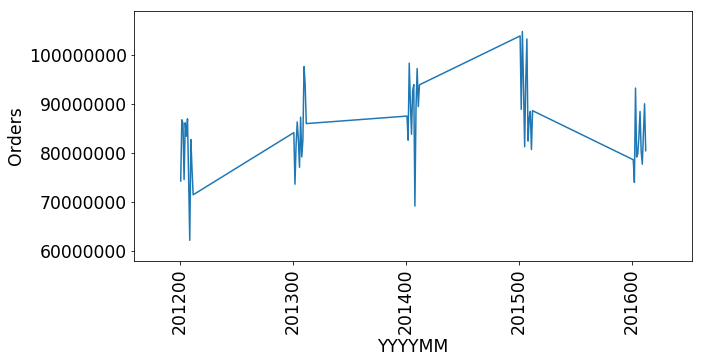

In [9]:
# uneven dates
#plot information
plt.xlabel('YYYYMM')
plt.ylabel('Orders')

plt.xticks(rotation='vertical')
 #Pad margins so that markers don't get clipped by the axes
plt.margins(.1)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.30)
plt.ticklabel_format(axis='y', style='plain')
plt.plot(totalOrdersbyDate)





In [10]:
#Generate Rolling Statistics
rolmean=totalOrdersbyDate.rolling(window=12).mean()
rolstd=totalOrdersbyDate.rolling(window=12).std()
print(rolmean.tail(),rolstd.tail())

        Order_Demand
YYYYMM              
201608  8.343017e+07
201609  8.265058e+07
201610  8.227503e+07
201611  8.305411e+07
201612  8.237327e+07         Order_Demand
YYYYMM              
201608  5.625104e+06
201609  5.731196e+06
201610  5.458955e+06
201611  5.857046e+06
201612  5.627661e+06


C:\Anaconda3500\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


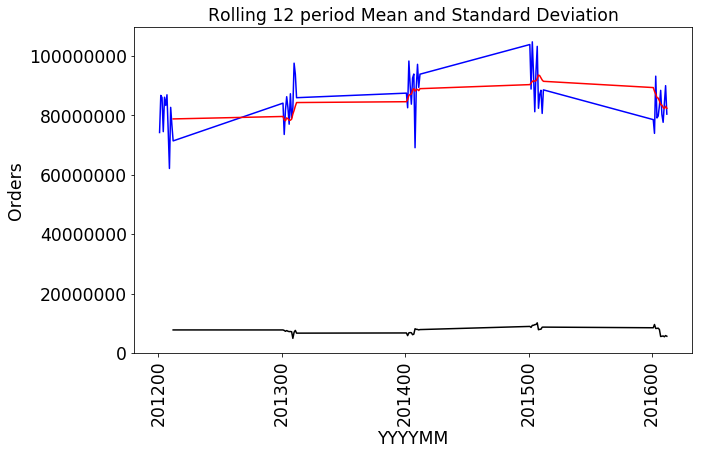

In [11]:
#Plot Rolling Stats
plt.xlabel('YYYYMM')
plt.ylabel('Orders')
plt.xticks(rotation='vertical')
plt.ticklabel_format(axis='y', style='plain')
plt.legend(loc='best')
plt.title('Rolling 12 period Mean and Standard Deviation')
orig = plt.plot(totalOrdersbyDate, color='blue',label='original')
mean = plt.plot(rolmean, color='red',label='mean' )
std = plt.plot(rolstd, color='black',label='std' )
plt.show(block=False)

# Observerd values look constant

In [12]:
# Perform Dickey Fuller Test (null hyp is that series is stationary)
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(totalOrdersbyDate['Order_Demand'],autolag ='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value {}'.format(key)] = value
print(dfoutput)

# results show stationary if p under 0.05

Results of Dickey-Fuller Test:
Test Statistic                 -2.045914
p-value                         0.266811
# Lags Used                     2.000000
Number of Observations Used    57.000000
Critical Value 1%              -3.550670
Critical Value 5%              -2.913766
Critical Value 10%             -2.594624
dtype: float64


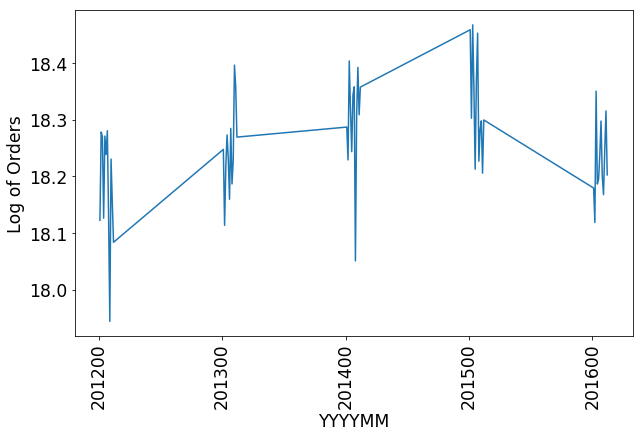

In [13]:
# try log of data

#use shapiro wilk? - what is the test to determine the appropriate transform.....

totalOrdersbyDate_LogScale = np.log(totalOrdersbyDate)
plt.xlabel('YYYYMM')
plt.ylabel('Log of Orders')
plt.xticks(rotation='vertical')
plt.plot(totalOrdersbyDate_LogScale)


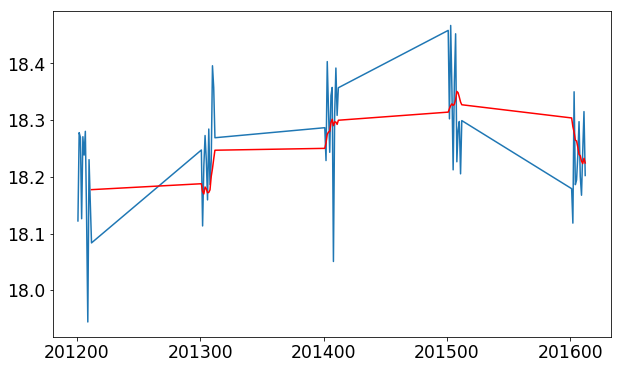

In [14]:
#Generate Rolling Statistics
movingAverage=totalOrdersbyDate_LogScale.rolling(window=12).mean()
movingstd=totalOrdersbyDate_LogScale.rolling(window=12).std()
plt.plot(totalOrdersbyDate_LogScale)
plt.plot(movingAverage, color='red')

In [15]:
datasetLogScaleMinusMovingAverage = totalOrdersbyDate_LogScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#remove nans
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(4)


,Order_Demand
YYYYMM,
201212,-0.093848
201301,0.059438
201302,-0.060687
201303,0.048656


In [16]:
# Perform Dickey Fuller Test (null hyp is that series is stationary...again
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # Compute rolling statistics
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    #Plot Rolling Statistics
    
    plt.xticks(rotation='vertical')
    plt.ticklabel_format(axis='y', style='plain')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    orig = plt.plot(timeseries, color='blue',label='Original')
    movingAverage = plt.plot(movingAverage, color='red',label='Rolling Mean' )
    movingSTD = plt.plot(movingSTD, color='black',label='Rolling Std' )
    plt.show(block=False)
    
    # Perform Dickey-Fuller Test:
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Order_Demand'],autolag ='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value {}'.format(key)] = value
    print(dfoutput)
    
    

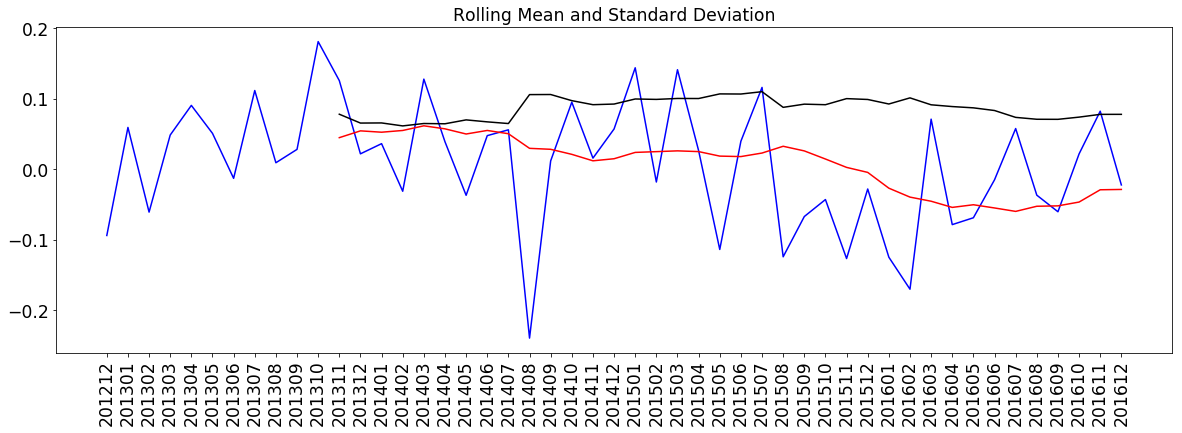

Results of Dickey-Fuller Test:
Test Statistic                 -1.502727
p-value                         0.532162
# Lags Used                     7.000000
Number of Observations Used    41.000000
Critical Value 1%              -3.600983
Critical Value 5%              -2.935135
Critical Value 10%             -2.605963
dtype: float64


In [101]:
test_stationarity(datasetLogScaleMinusMovingAverage)

C:\Anaconda3500\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


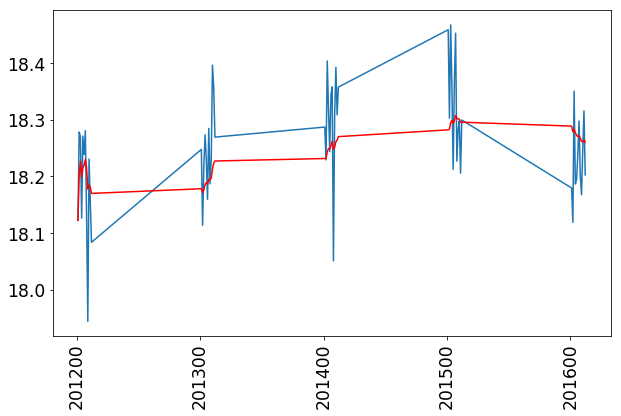

In [17]:
exponentialDecayWeightedAverage=totalOrdersbyDate_LogScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.xticks(rotation='vertical')
plt.ticklabel_format(axis='y', style='plain')
plt.legend(loc='best')
plt.plot(totalOrdersbyDate_LogScale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

C:\Anaconda3500\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


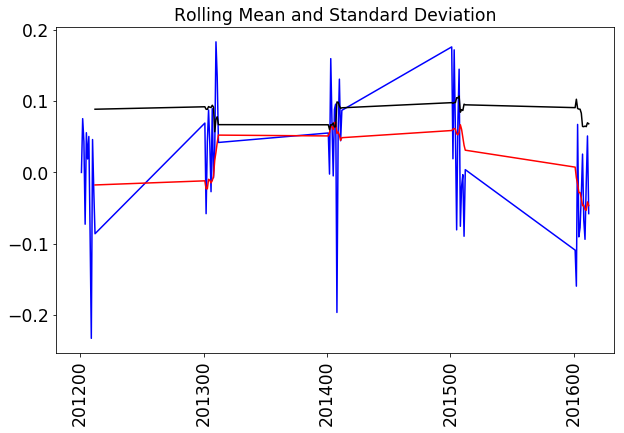

Results of Dickey-Fuller Test:
Test Statistic                 -2.432950
p-value                         0.132652
# Lags Used                     2.000000
Number of Observations Used    57.000000
Critical Value 1%              -3.550670
Critical Value 5%              -2.913766
Critical Value 10%             -2.594624
dtype: float64


In [18]:
datasetLogScaleMinusMovingExponentialDecayAverage = totalOrdersbyDate_LogScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

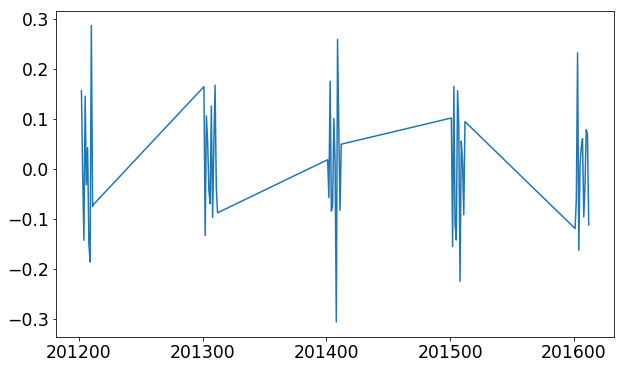

In [19]:
datasetLogDiffShifting = totalOrdersbyDate_LogScale - totalOrdersbyDate_LogScale.shift()
plt.plot(datasetLogDiffShifting)

C:\Anaconda3500\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


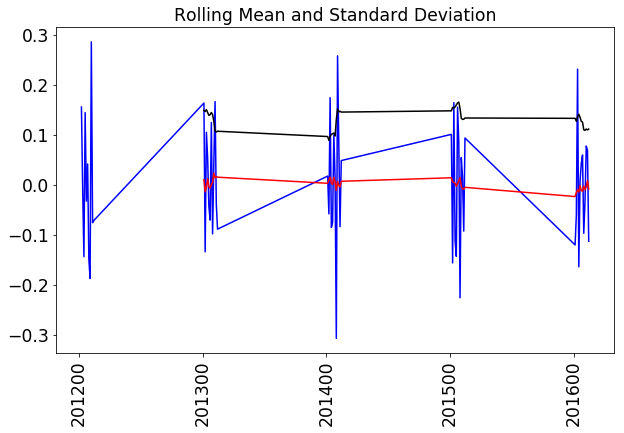

Results of Dickey-Fuller Test:
Test Statistic                -1.293855e+01
p-value                        3.574839e-24
# Lags Used                    1.000000e+00
Number of Observations Used    5.700000e+01
Critical Value 1%             -3.550670e+00
Critical Value 5%             -2.913766e+00
Critical Value 10%            -2.594624e+00
dtype: float64


In [20]:
datasetLogDiffShifting.head()
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [22]:

#AttributeError: 'Index' object has no attribute 'inferred_freq'
#need to set index to datetimeindex
totalOrdersbyDate_LogScale.reset_index(inplace=True)

#totalOrdersbyDate_LogScale.head()

totalOrdersbyDate_LogScale['YYYYMM'] = pd.to_datetime(totalOrdersbyDate_LogScale['YYYYMM'], format='%Y%m', errors='coerce').dropna()
totalOrdersbyDate_LogScale = totalOrdersbyDate_LogScale.set_index('YYYYMM')
totalOrdersbyDate_LogScale.head()



,Order_Demand
YYYYMM,
2012-01-01,18.122476
2012-02-01,18.278101
2012-03-01,18.269787
2012-04-01,18.126354
2012-05-01,18.270958


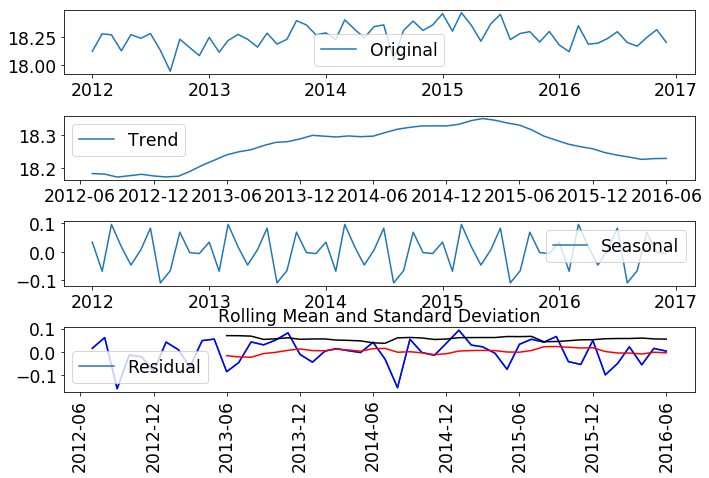

Results of Dickey-Fuller Test:
Test Statistic                 -4.247222
p-value                         0.000548
# Lags Used                     3.000000
Number of Observations Used    44.000000
Critical Value 1%              -3.588573
Critical Value 5%              -2.929886
Critical Value 10%             -2.603185
dtype: float64


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
#print(totalOrdersbyDate_LogScale)
decomposition = seasonal_decompose(totalOrdersbyDate_LogScale)
#AttributeError: 'Index' object has no attribute 'inferred_freq'
#need to set index to datetimeindex

trend = decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(totalOrdersbyDate_LogScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label = 'Residual')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)




In [ ]:
#ACF and PACF Plots
from statsmodels.tsa.stattools import acf,pacf
